In [1]:
!pip install yfinance

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [20]:
start = '2023-09-05'
end = '2024-09-17'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [21]:
data.reset_index(inplace=True)

In [22]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-09-05,136.440002,137.369995,135.559998,136.710007,136.375107,17730200
1,2023-09-06,137.014999,137.479996,134.690002,135.369995,135.038361,15814300
2,2023-09-07,134.600006,136.580002,133.960007,136.199997,135.866348,16976000
3,2023-09-08,135.869995,137.514999,135.869995,137.199997,136.863876,17810700
4,2023-09-11,137.380005,138.264008,136.550003,137.740005,137.402573,17180800
...,...,...,...,...,...,...,...
255,2024-09-10,151.449997,152.300003,149.542999,150.009995,150.009995,20401800
256,2024-09-11,151.089996,152.479996,148.699997,152.149994,152.149994,18991500
257,2024-09-12,154.809998,155.610001,153.500000,155.539993,155.539993,21024100
258,2024-09-13,156.362000,159.274994,156.110001,158.369995,158.369995,16733900


In [23]:
ma_100_days = data.Close.rolling(100).mean()

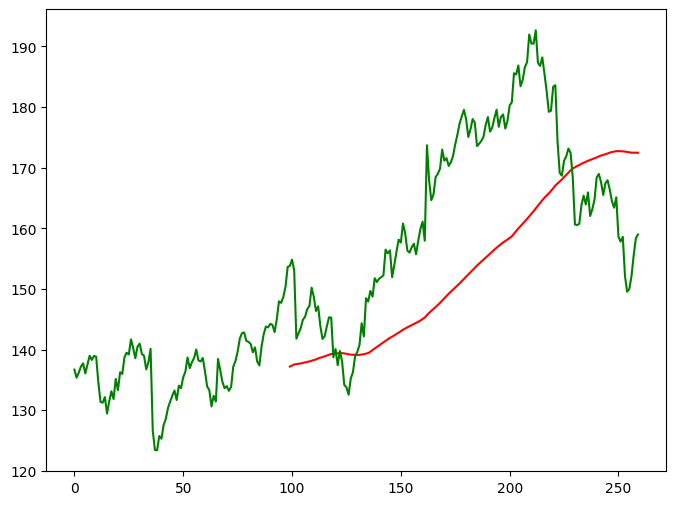

In [24]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [25]:
ma_200_days = data.Close.rolling(200).mean()

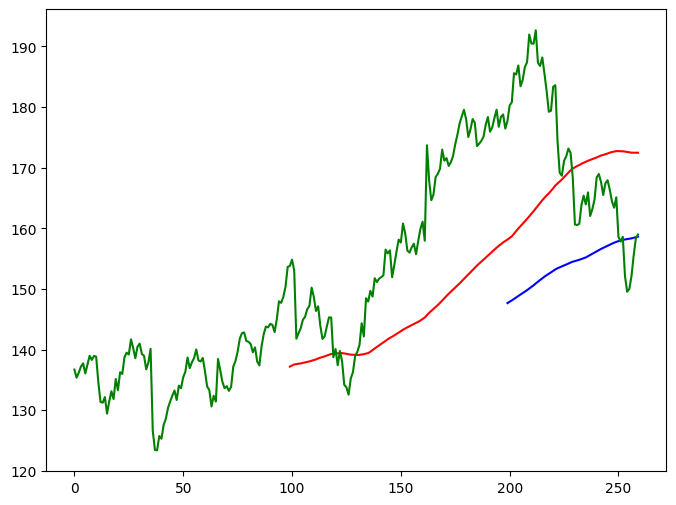

In [26]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [27]:
data.dropna(inplace=True)

In [28]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [29]:
data_train.shape[0]

208

In [30]:
data_test.shape[0]

52

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [32]:
data_train_scale = scaler.fit_transform(data_train)

In [33]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [34]:
x, y = np.array(x), np.array(y)

In [35]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [36]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

C:\Users\HARSHUL\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [37]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [38]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - loss: 0.3912
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.3132
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.1718
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.1193
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0570
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0867
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.0534
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.0392
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0457
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0384
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0452
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0300
Epoch 13/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.0297
Epoch 14/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0258
Epoch 15/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0301
Epoch 16/50
4/4 ━━━━━━━━━━━━━━━━━━

In [39]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [40]:
pas_100_days = data_train.tail(100)

In [41]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [42]:
data_test_scale  =  scaler.fit_transform(data_test)

In [43]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [44]:
y_predict = model.predict(x)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 345ms/step


In [45]:
scale =1/scaler.scale_

In [46]:
y_predict = y_predict*scale

In [47]:
y = y*scale

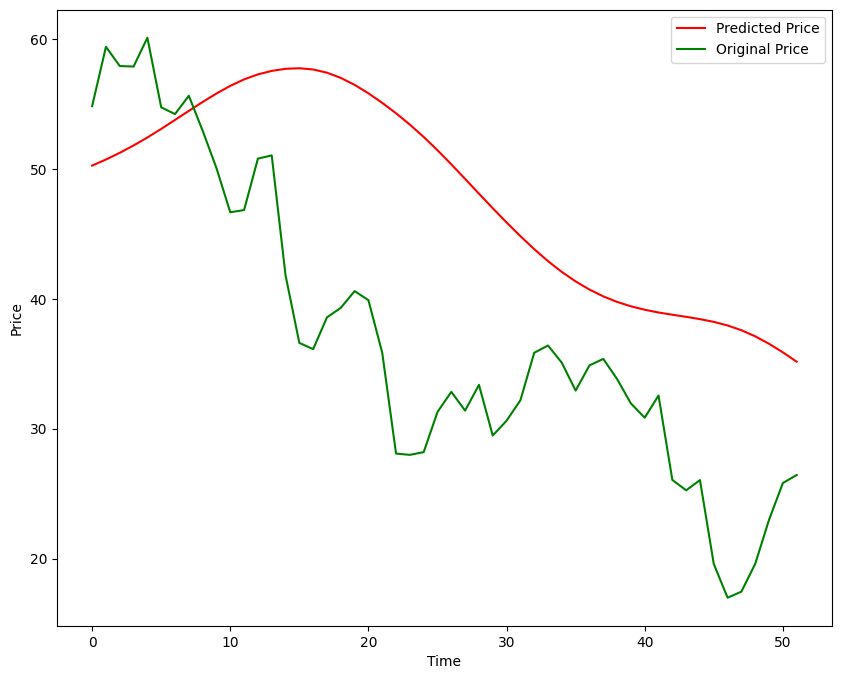

In [48]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [51]:
model.save('model.h5')